<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Openstreetmap-Project" data-toc-modified-id="Openstreetmap-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Openstreetmap Project</a></span><ul class="toc-item"><li><span><a href="#List-of-modules-used" data-toc-modified-id="List-of-modules-used-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>List of modules used</a></span></li><li><span><a href="#Set-the-data-file" data-toc-modified-id="Set-the-data-file-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Set the data file</a></span></li></ul></li><li><span><a href="#Read-data-from-OSM-file-and-create-some-csv-files" data-toc-modified-id="Read-data-from-OSM-file-and-create-some-csv-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data from OSM file and create some csv files</a></span></li><li><span><a href="#Create-the-database" data-toc-modified-id="Create-the-database-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create the database</a></span></li><li><span><a href="#Populate-the-database" data-toc-modified-id="Populate-the-database-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Populate the database</a></span></li><li><span><a href="#Analysis-of-the-data" data-toc-modified-id="Analysis-of-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis of the data</a></span><ul class="toc-item"><li><span><a href="#How-many-nodes-in-the-database?" data-toc-modified-id="How-many-nodes-in-the-database?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>How many nodes in the database?</a></span></li><li><span><a href="#How-many-ways-in-the-database?" data-toc-modified-id="How-many-ways-in-the-database?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>How many ways in the database?</a></span></li><li><span><a href="#How-many-users-are-in-the-tables?" data-toc-modified-id="How-many-users-are-in-the-tables?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>How many users are in the tables?</a></span></li><li><span><a href="#List-of-different-type-of-elements-in-the-file" data-toc-modified-id="List-of-different-type-of-elements-in-the-file-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>List of different type of elements in the file</a></span></li><li><span><a href="#What-about-fire-protection?" data-toc-modified-id="What-about-fire-protection?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>What about fire protection?</a></span></li><li><span><a href="#Check-of-the-name-of-the-objects" data-toc-modified-id="Check-of-the-name-of-the-objects-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Check of the name of the objects</a></span><ul class="toc-item"><li><span><a href="#Check-of-the-name-extentions" data-toc-modified-id="Check-of-the-name-extentions-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Check of the name extentions</a></span></li><li><span><a href="#Check-the-correctness-of-the-hyphenation" data-toc-modified-id="Check-the-correctness-of-the-hyphenation-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Check the correctness of the hyphenation</a></span></li><li><span><a href="#Check-the-correctness-of-the-name-composed-by-a-place" data-toc-modified-id="Check-the-correctness-of-the-name-composed-by-a-place-5.6.3"><span class="toc-item-num">5.6.3&nbsp;&nbsp;</span>Check the correctness of the name composed by a place</a></span></li></ul></li><li><span><a href="#Correction-of-values-in-the-database" data-toc-modified-id="Correction-of-values-in-the-database-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Correction of values in the database</a></span></li></ul></li><li><span><a href="#Close-the-database" data-toc-modified-id="Close-the-database-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Close the database</a></span></li><li><span><a href="#Possible-improvement" data-toc-modified-id="Possible-improvement-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Possible improvement</a></span><ul class="toc-item"><li><span><a href="#Use-a-dictionary" data-toc-modified-id="Use-a-dictionary-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Use a dictionary</a></span></li><li><span><a href="#Cross-the-data-on-a-bigger-dataset" data-toc-modified-id="Cross-the-data-on-a-bigger-dataset-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Cross the data on a bigger dataset</a></span></li><li><span><a href="#Better-visualisation" data-toc-modified-id="Better-visualisation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Better visualisation</a></span></li></ul></li></ul></div>

In [1]:
import sys
import os
import xml.etree.ElementTree
import csv
import re
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

# Openstreetmap Project

The goal of this project is to parse data from a openstreetmap OSM file (XML format), populate a database and perform some analysis.

## List of modules used

In [2]:
print("Python: Version {}".format(sys.version))
print("sqlite3: sqlite3 is a python embedded module. Please refer to the python's version.")
print("xml.etree.ElementTree: xml is a python embedded module. Please refer to the python's version.")
print("os: os is a python embedded module. Please refer to the python's version.")
print("csv: Version {}".format(csv.__version__))
print("re: Version {}".format(re.__version__))
print("pandas: Version {}".format(pd.__version__))
print('matplotlib: Version {}'.format(matplotlib.__version__))
print('numpy: Version {}'.format(np.__version__))

Python: Version 3.6.6 (default, Sep 12 2018, 18:26:19) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
sqlite3: sqlite3 is a python embedded module. Please refer to the python's version.
xml.etree.ElementTree: xml is a python embedded module. Please refer to the python's version.
os: os is a python embedded module. Please refer to the python's version.
csv: Version 1.0
re: Version 2.2.1
pandas: Version 0.23.4
matplotlib: Version 3.0.0
numpy: Version 1.15.2


## Set the data file

The data is the area covers the city of Buxtehude and some area in south and east. This area contains some city and land parts and have probably less focus than big cities.

The area is visible here:

https://www.openstreetmap.org/export#map=12/53.4352/9.7596

The data are exported in the OSM file: **Buxtehude.osm**

To perform this studie a smaller subset was extracted:

https://www.openstreetmap.org/export#map=14/53.4383/9.6234

The data are exporter in the OSM file: **Apensen.osm**

In [3]:
#dataFileName = 'Apensen.osm'
dataFileName = 'Buxtehude.osm'

In [4]:
statinfo = os.stat(dataFileName)
print('Size of the source file {}: {:.3f}Mb'.format(dataFileName, statinfo.st_size / (1024 * 1024))) 

Size of the source file Buxtehude.osm: 64.846Mb


Database filename

In [5]:
dbFileName = 'Openstreetmap.db'

# Read data from OSM file and create some csv files

The first part is to read the data from the OSM file and export them to some CSV files.

For clarity the process is split in several functions (see below). Then main function is called 'parseOSMfile'.

The OSM file is opened with the XML parser and the elements are read in sequence. The data are store in the relevant CSV file.

At the end, one CSV file will be obtain per table in the database.

In [ ]:
# List of all csv files
csvFiles = {'node':'nodes.csv',
         'way':'ways.csv',
         'node_tags': 'nodes_tags.csv',
         'way_tags': 'ways_tags.csv',
         'way_node':'ways_nodes.csv'}

# List of all fields for the csv files and the database
fields = {'node': ['id', 'lat', 'lon', 'user', 'uid', 'version', 'changeset', 'timestamp'],
           'way': ['id', 'user', 'uid', 'version', 'changeset', 'timestamp'],
           'node_tags': ['id', 'key', 'value', 'type'],
           'way_tags': ['id', 'key', 'value', 'type'],
           'way_node': ['id', 'node_id', 'position']} 

In [ ]:
# Functions used to parse the OSM file and writte in the CSV files

def initCSVfiles():
    '''
    Create empty csv files and add the header line
    
    parameters:
    ------------
    None
    
    returns:
    --------
    a dictionary containing the file descriptor and the csv writer object
    '''
    fileDescriptor = {}
    for f in csvFiles:
        #print('init {}'.format(files[f]))
        fileId = open(csvFiles[f], 'w', encoding='utf-8')
        csvWriter = csv.writer(fileId, delimiter=';',
                            quotechar='\'', quoting=csv.QUOTE_MINIMAL)
        csvWriter.writerow(fields[f])
        fileDescriptor[f] = {}
        fileDescriptor[f]['fileId'] = fileId
        fileDescriptor[f]['csvWriter'] = csvWriter
        
    return fileDescriptor

def closeCSVfiles(fileDesc):
    '''
    Close all csv files opened
    
    parameters:
    -----------
    the file descriptor dictionary returned by the initCSVfiles function.
    
    returns:
    --------
    None
    '''
    for f in fileDesc:
        fileDesc[f]['fileId'].close()

In [ ]:
def writeElem(elemType, elem, fileDesc):
    '''
    write an element in the corresponding csv file
    
    parameters:
    -----------
    - elemType: a string of the type of element to be written.
    - elem: dict of data to be written in the csv file
    - fileDesc: dictionary of the file decriptor (given by the initCSVfiles function)
    
    returns:
    --------
    None
    '''
    record = []
    for i in fields[elemType]:
        record.append(elem[i])
    
    fileDesc[elemType]['csvWriter'].writerow(record)


In [6]:
def correctBadCaracters(string):
    '''
    remove problematic charracteres from a stings.
    
    All special character in the form '&#xxx;' will be removed and semi-colon will be replaced by a
    space char.
    
    parameters:
    -----------
    - string: the string to be corrected
    
    returns:
    --------
    the input string without problematic characters
    '''
    correctedString = ''
    start = 0
    end = 0
    
    # Remove the '&#xxx' special caracters
    pattern = r'&#?.*?;'
    if re.search(pattern, string):
        for m in re.finditer(pattern, string):
            end = m.start()
            correctedString += string[start:end]
            start = m.end()
    else:
        correctedString = string
    
    # Remove remaning semi-colon
    correctedString = correctedString.replace(';', ' ')
    
    return correctedString
    
def parseTag(id, attrib):
    '''
    Parse the tag k and return the value, the key and the type
    
    parameters:
    -----------
    - id: id of the node or the way
    - attrib: XML object
    
    returns:
    --------
    a dictionary with the Id of the parent, the key, value and type
    '''
    
    if 'k' in attrib:
        pattern = re.compile('^([a-z_]+):(.*)$')
        match = pattern.match(attrib['k'])
    
        if match:
            type_ = match.group(1)
            key = match.group(2)
        else:
            type_ = attrib['k']
            key = ''
    else:
        key = None
        type_ = None
    
    # Correct the value string which can contain problematic characters
    value = correctBadCaracters(attrib['v'])
    return {'id': id, 'key':key, 'value':value, 'type':type_} 

In [ ]:
def parseElement(element, fileDesc):
    '''
    parse an element and write the data in the different csv files
    
    parameters:
    -----------
    - element: XML object to be parsed
    - fileDesc: dictionary of the file decriptor (given by the initCSVfiles function)

    returns:
    --------
    None
    '''
    targetElement = ['node', 'way']
    
    if element.tag in targetElement:
        #print('Parsing: {}'.format(element.tag))
        selectedAttribs = fields[element.tag]

        # Parse the main elements Node and Way
        attribs = element.attrib
        elem = {}
        for i in selectedAttribs:
            elem[i] = attribs[i]  
        writeElem(element.tag, elem, fileDesc)
        
        # Parse the subelements Tag and Nd
        position = 0
        for e in element:
            tag = {}
            node = {}
            if e.tag == 'nd':
                node = {'id': elem['id'], 'node_id': e.attrib['ref'], 'position': position}
                position += 1
                writeElem('way_node', node, fileDesc)
            elif e.tag == 'tag':
                tag = parseTag(elem['id'], e.attrib)
                writeElem(element.tag + '_tags', tag, fileDesc)

In [ ]:
def parseOSMfile(fileName):
    '''
    main function to extract the data from an OSM file to CSV files
    
    parameters:
    -----------
    fileName: string of the path of the OSM file
    
    returns:
    --------
    None
    '''
    fileDesc = initCSVfiles()
    e = xml.etree.ElementTree.parse(fileName).getroot()
    for element in e:
        parseElement(element, fileDesc)
    closeCSVfiles(fileDesc)

The CSV files can be generated:

In [7]:
parseOSMfile(dataFileName)

List of all CSV files in the current directory:

In [8]:
fileList = os.listdir()

print('List of csv files.')
pattern = re.compile('.*\.csv$')
for f in fileList:
    if pattern.match(f):
        statinfo = os.stat(f)
        print('File {} ({:.1f}kb)'.format(f, statinfo.st_size / 1024))
    

List of csv files.
File nodes_tags.csv (1502.7kb)
File ways_nodes.csv (8054.3kb)
File nodes.csv (20556.0kb)
File ways.csv (2965.4kb)
File ways_tags.csv (4491.3kb)


Those files can be used to populate the database

# Create the database

From the CSV, it is now easy to populate the database. The database will be created with the schema contains in the file 'data_wrangling_schema.sql'

The database is a SQLite one.

In [9]:
# Creation of the database

# To avoid errors, if the database file does not exist, it is created else just the connexion will
# be established.
if not os.path.isfile(dbFileName):
    conn = sqlite3.connect(dbFileName)
    c = conn.cursor()
    with open('data_wrangling_schema.sql') as f:
        print('Creating database...')
        text = f.read()
        c.executescript(text)
        conn.commit()
        print('Execute SQL statement: \n{}'.format(text))
else:
    print('Database file {} already exists. This file will be use.'.format(dbFileName))
    conn = sqlite3.connect(dbFileName)
    c = conn.cursor()

Creating database...
Execute SQL statement: 
CREATE TABLE nodes (
    id INTEGER PRIMARY KEY NOT NULL,
    lat REAL,
    lon REAL,
    user TEXT,
    uid INTEGER,
    version INTEGER,
    changeset INTEGER,
    timestamp TEXT
);

CREATE TABLE nodes_tags (
    id INTEGER,
    key TEXT,
    value TEXT,
    type TEXT,
    FOREIGN KEY (id) REFERENCES nodes(id)
);

CREATE TABLE ways (
    id INTEGER PRIMARY KEY NOT NULL,
    user TEXT,
    uid INTEGER,
    version TEXT,
    changeset INTEGER,
    timestamp TEXT
);

CREATE TABLE ways_tags (
    id INTEGER NOT NULL,
    key TEXT NOT NULL,
    value TEXT NOT NULL,
    type TEXT,
    FOREIGN KEY (id) REFERENCES ways(id)
);

CREATE TABLE ways_nodes (
    id INTEGER NOT NULL,
    node_id INTEGER NOT NULL,
    position INTEGER NOT NULL,
    FOREIGN KEY (id) REFERENCES ways(id),
    FOREIGN KEY (node_id) REFERENCES nodes(id)
);



# Populate the database

The database file exists, it can be populated with the CSV files previously generated.

In [10]:
# Function to populate the dabase

def populateDatabase(dbConn):
    '''
    populate the database with the CSV files.
    
    The name of the files and the table are extracted from the global table 'csvFiles'
    
    parameters:
    -----------
    - dbConn: connexion variable to the database
    
    returns:
    --------
    None
    '''
    for f in csvFiles:
        print('Reading file {} for table {}'.format(csvFiles[f], csvFiles[f].split('.')[0]))
        df = pd.read_csv(csvFiles[f], sep=';', dtype={"id": np.int32})
        df.to_sql(csvFiles[f].split('.')[0], dbConn, if_exists='replace', index=False)

In [11]:
populateDatabase(conn)

Reading file nodes.csv for table nodes
Reading file ways.csv for table ways
Reading file nodes_tags.csv for table nodes_tags
Reading file ways_tags.csv for table ways_tags
Reading file ways_nodes.csv for table ways_nodes


Now the database is populated and can be used.

# Analysis of the data

## How many nodes in the database?

In [12]:
c.execute('SELECT COUNT(id) FROM nodes')
print('There are {} nodes in the database'.format(c.fetchall()[0][0]))

There are 258469 nodes in the database


## How many ways in the database?

In [13]:
c.execute('SELECT COUNT(id) FROM ways')
print('There are {} ways in the database'.format(c.fetchall()[0][0]))

There are 50898 ways in the database


## How many users are in the tables?

In [14]:
c.execute('SELECT COUNT(DISTINCT user) FROM ways')
print('There are {} different users in the ways table'.format(c.fetchall()[0][0]))

c.execute('SELECT COUNT(DISTINCT user) FROM nodes')
print('There are {} different users in the nodes table'.format(c.fetchall()[0][0]))

There are 496 different users in the ways table
There are 592 different users in the nodes table


## List of different type of elements in the file

It is possible to have an idea of what sort of information are contains by having a look to the field 'type' of the nodes tags.

For clarity, only a part of the type are displayed here. Replace the last line by 'print(df.values)' to see the whole list.

In [15]:
sqlQuery = 'SELECT DISTINCT nodes_tags.type \
          FROM nodes_tags;'
df = pd.read_sql(sqlQuery, conn)
print(df.values[20:35])

[['railway']
 ['tactile_paving']
 ['uic_name']
 ['uic_ref']
 ['crossing']
 ['bus']
 ['lwn_ref']
 ['amenity']
 ['entrance']
 ['access']
 ['barrier']
 ['crossing_ref']
 ['entrance_marker']
 ['toilets']
 ['wheelchair']]


## What about fire protection?

The type 'water_hydrant' can be interessing to see.

In [16]:
c.execute('SELECT count(type) \
          FROM nodes_tags \
          WHERE type == \'fire_hydrant\' AND nodes_tags.key = \'type\';')
print('There are {} fire hydrants in the database'.format(c.fetchall()[0][0]))

There are 793 fire hydrants in the database


It should be possible to see their location. We can extract their position in latitude and longitude from the nodes table.

Displaying only the position it is hard to really see. We will extract also the ways and the name of the places.

*Note: For performance reason, the map can take some times to be generated. It is possible to activate the generation of the ways by setting the parameter 'plotWays' to True. The parameter 'plotPlace' can also be set to False but it not improve the performance just the visualisation.*

In [17]:
# Function to plot the ways and the name of the place

def plotMap(plotWays = False, plotPlaces = True):
    # Extraction of the ways.
    if plotWays:
        sqlQuery = 'SELECT ways_nodes.id, ways_nodes.position, nodes.lat, nodes.lon \
              FROM ways_nodes \
              JOIN nodes \
              WHERE ways_nodes.node_id = nodes.id;'
        df = pd.read_sql(sqlQuery, conn)
        wayList = df['id'].unique()
        for way in wayList:
            singleWay = df[df['id'] == way].sort_values(by = ['position'])
            plt.plot(singleWay['lon'], singleWay['lat'], c='k', alpha=0.3)
    
    # Extraction of the name of the place.
    # For that a self join is needed because the name of the place separate from the type.
    # Also in name are given in German and Plattdeutsch. Only the German name should be selected
    # (it is the reason of the 'B.key IS NULL')
    if plotPlaces:
        sqlQuery = 'SELECT B.value, nodes.lat, nodes.lon \
              FROM nodes_tags A, nodes_tags B \
              JOIN nodes \
              ON nodes.id = A.id \
              WHERE A.type = \'place\' \
              AND B.type = \'name\' AND B.key IS NULL\
              AND A.id = B.id;'
        df = pd.read_sql(sqlQuery, conn)
        for i in range(df.shape[0]):
            plt.annotate(df.iloc[i]['value'], xy=(df.iloc[i]['lon'], df.iloc[i]['lat']), fontsize=15)

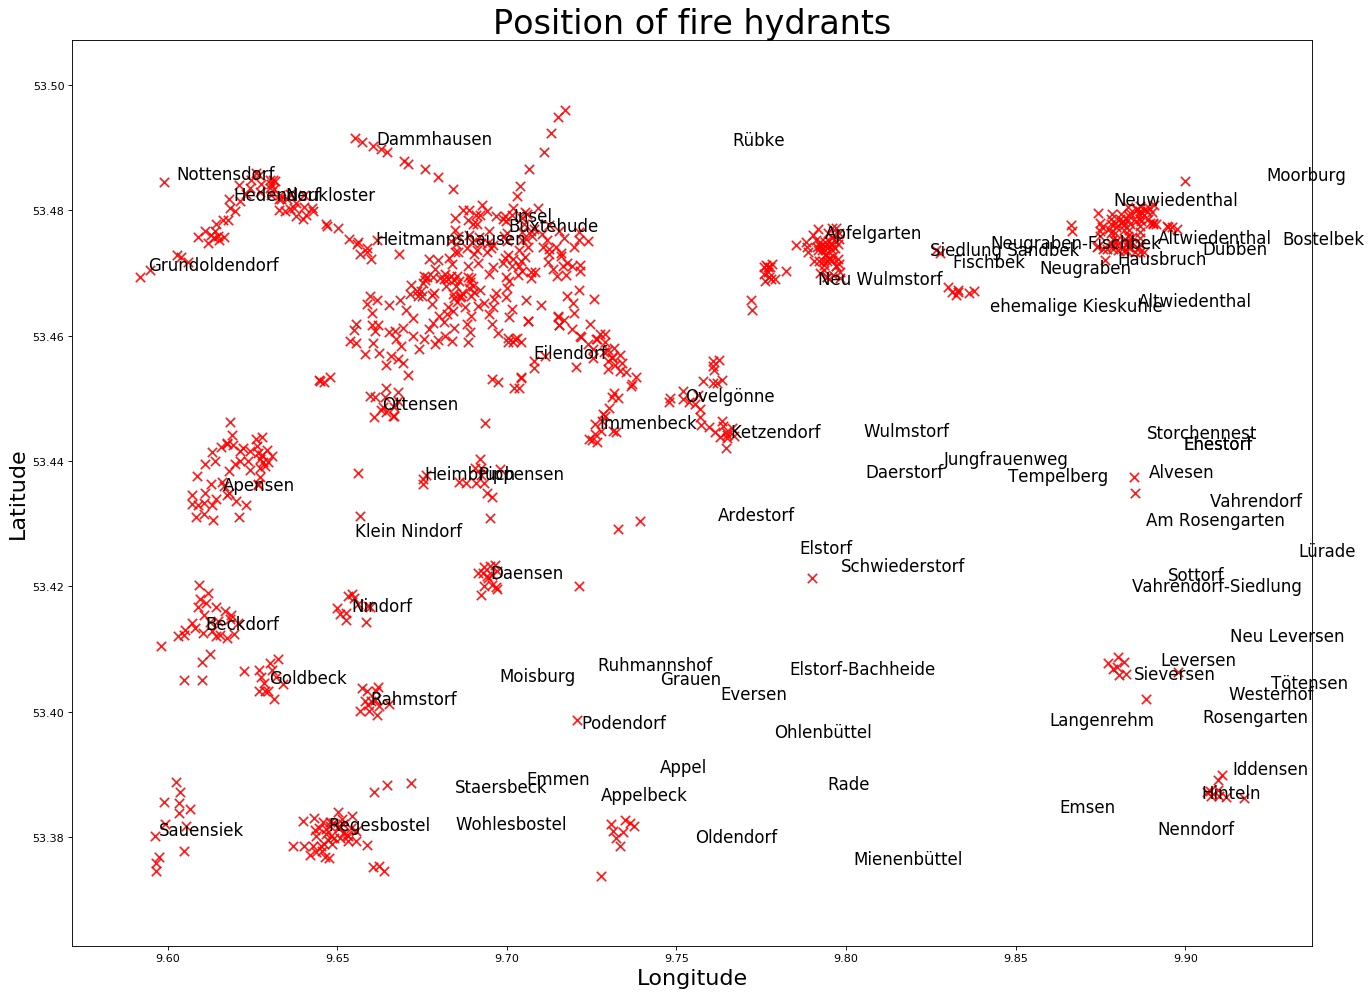

In [18]:
# Extract all Fire_hydrant with their latitude and longitude
sqlQuery = 'SELECT nodes.lat, nodes.lon, nodes_tags.type, nodes_tags.key, nodes_tags.value \
          FROM nodes \
          JOIN nodes_tags ON nodes.id = nodes_tags.id \
          WHERE nodes_tags.type == \'fire_hydrant\' AND nodes_tags.key = \'type\';'
df = pd.read_sql(sqlQuery, conn)


plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')  
plotMap(plotWays = False)
plt.title('Position of fire hydrants', fontdict={'fontsize': 30})
plt.xlabel('Longitude', fontdict={'fontsize': 20})
plt.ylabel('Latitude', fontdict={'fontsize': 20})
plt.scatter(df['lon'], df['lat'], marker='x', s=70, c='r', alpha=0.9)
plt.show()

Some empty areas are clearly visible in the land part. This probably due to a lack of information. The land part are less covered by people who update the map. To improve the map, some effort can be done for the village without information.

## Check of the name of the objects

A quality check of the naming can be done.
For clarity, only the 10 first names are displayed.

In [19]:
sqlQuery = 'SELECT DISTINCT value FROM ways_tags WHERE type == \'addr\' AND key=\'street\''
names = pd.read_sql(sqlQuery, conn)
names[0:10]

,value
0,Cuxhavener Straße
1,Hardauring
2,Rehrstieg
3,Waltershofer Straße
4,Zum Lehmfeld
5,Am Neugrabener Bahnhof
6,Am Dorfteich
7,Zum Schlüsselberg
8,Ovelgönner Straße
9,Am Jehrdenberg


In Germany the  naming convention of the streets is quite tricky. Some streets have only one word for some others Straße or Weg are separated and some other contains some hyphens. The rule is as the following:
- The standard is to name the ways or place with one word. (Like 'Torfweg' or 'Falkenstraße')
- If the name refers to a person and this name is only one word, the name will be written in one word (e.g. Goethestraße)
- If the name refers to a person and this name is composed by several words, the name will be written in several words but separate by an hypen (e.g. 'Catharina-Gerkens-Weg')
- If the name refer to a place, it will be written in several words (e.g. 'Buxtehuder Straße')
- If the name refer to a quality (straight, blue...), it will be written in several words (e.g. 'Blauer Weg', 'Alter Platz')

In Germany, the names of the streets are often written as "str" instead of 'Straße' (e.g. 'Landstr.')

To verify all this rules a dictionary will be needed. This is out of scope of this project but can be taken for improvements.

What can be done is:
- Check the extention of the street name ('Straße' and not 'Str.') (Can be done automaticaly)
- Correctness of the hyphenation (should be done manually)
- Check of name if refers to a place (it will end by 'er'). (should be done partily manually)

### Check of the name extentions

The name of the streets must be ' Straße' or '\*straße' and not ' Str. or '\*str.'

In [20]:
names[names.value.str.match('.* ?[sS]tr\.?$')]

,value
915,Neukloster Str.


One error found. The good value is 'Neukloster Straße'

### Check the correctness of the hyphenation

The check is to see if some names are composed by only two words or not composed by a name of a person.

For clarity, only the first 10 name are exported but the whole list was inspected.

In [21]:
names[names.value.str.match('\w+\-')][0:10]

,value
30,Georg-Heyken-Straße
34,Theodor-Heuss-Straße
51,Justus-von-Liebig-Straße
66,Konrad-Adenauer-Allee
67,Rudolf-Diesel-Straße
74,Bertha-von-Suttner-Allee
111,Helga-Wex-Platz
143,August-Somann-Weg
157,Gerhart-Hauptmann-Ring
158,Wilhelm-Busch-Straße


All are named from People and are composed by several words. It is all correct.

### Check the correctness of the name composed by a place

The name of the place are in general ended by 'er'. The name should be like 'Buxtehuder Straße'. All name composed by *erstraße, *erweg or *erplatz are suspect and should be verified.

For clarity, only the first 10 name are exported but the whole list was inspected.

In [22]:
names[names.value.str.match('.*er .*$')][0:10]

,value
0,Cuxhavener Straße
3,Waltershofer Straße
5,Am Neugrabener Bahnhof
8,Ovelgönner Straße
10,Grauener Weg
12,Ardestorfer Weg
16,Hausbrucher Bahnhofstraße
21,Neuwiedenthaler Straße
26,Harburger Straße
27,Stader Straße


We find again the 'Neukloster Str.' but the rest seems to be correct.

What about the one words names?

For clarity, only the first 10 name are exported but the whole list was inspected.

In [23]:
names[names.value.str.match('.*er(?:str|weg|platz).*$')][0:10]

,value
70,Vaßmerstraße
72,Genslerweg
89,Ölschlägerweg
125,Kottmeierstraße
145,Rohrammerweg
147,Sumpfläuferweg
148,Minnerweg
166,Weberstraße
183,Meisterweg
185,Schifferstraße


At first look, it seems to be correct. Nevertheless a deeper inspection is needed.

## Correction of values in the database

One error was found. 'Neukloster Straße' is named 'Neukloster Str.'. Let fixt it. We will do it in a programatical way. The process can be reused on other dataset.

First we can extract the name of the streets we want to change (this can be given by an algorithm which check the error with a dictionary)

Let find a methode to correct all Str. abbreviations automaticaly.

We want to correct such values:

In [24]:
originalNames = names[names.value.str.match('.* ?[sS]tr\.?$')]
originalNames

,value
915,Neukloster Str.


We can write a function which correct the name. As we see in german the words can be glued together or separated by a space or an hypen. Our methode must cover all those cases.

In [25]:
def ExpandAbbreviation(name):
    pattern = '^(.*[ -]??)[sS]tr\.?$'
    s = re.match(pattern, name) 
    if s:
        if s.group(1)[-1] in [' ', '-']:
            return s.group(1) + 'Straße'
        else:
            return s.group(1) + 'straße'
    else:
        return name



Let tests some cases:

In [26]:
testNames = ['Test', 'Teststraße', 'Test Straße',
             'Test Str.', 'Test Str',
             'Test str.', 'Test str',
             'Teststr.', 'Teststr',
             'Test-foo-Str.', 'Test-foo-str'
            ]
for n in testNames:
    print('{}\t-->\t{}'.format(n, ExpandAbbreviation(n)))

Test	-->	Test
Teststraße	-->	Teststraße
Test Straße	-->	Test Straße
Test Str.	-->	Test Straße
Test Str	-->	Test Straße
Test str.	-->	Test Straße
Test str	-->	Test Straße
Teststr.	-->	Teststraße
Teststr	-->	Teststraße
Test-foo-Str.	-->	Test-foo-Straße
Test-foo-str	-->	Test-foo-Straße


It works on the test cases. Let apply the functions on our values.

In [27]:
newNames = originalNames['value'].apply(ExpandAbbreviation).values.flatten()

In [28]:
newNames

array(['Neukloster Straße'], dtype=object)

The names are corrected. We have to correct them in the database.

In [29]:
sqlUpdateRequest = 'UPDATE ways_tags SET value = \'{}\' WHERE value = \'{}\';'
for i in range(len(originalNames['value'].values.flatten())):
    sqlQuery = sqlUpdateRequest.format(newNames[i], originalNames['value'].values.flatten()[i])
    c.execute(sqlQuery)

Are the errors corrected?

In [30]:
sqlQuery = 'SELECT DISTINCT value FROM ways_tags WHERE type == \'addr\' AND key=\'street\''
names = pd.read_sql(sqlQuery, conn)
names[names.value.str.match('.* ?[sS]tr\.?$')]

,value


No more wrong value anymore but are they really corrected?

In [31]:
names[names.value.str.match('Neukloster.*$')]

,value
481,Neukloster Straße


All is fine now.

# Close the database

Now the database connection can be closed.

In [32]:
conn.close()

# Possible improvement

## Use a dictionary

As we see the naming convention is quite tricky. To check a dataset manually it can be a long boring job. Reduce the workload. A diationary approch can be used to remove the name which are clearly legal. The manual work will be reduce to the suspect names.

This can be done for the name based on people name.

## Cross the data on a bigger dataset

Another approch to find suspicious name is to cross the data with a biger dataset. The name of the place and street are very often redundant to a city to another. It is possible to extract the root of the names and compare the difference between the places.

If we concidere that the database contains data of good quality, we can supose that in average the name are good. A statiscal approch is probably a good one. 

## Better visualisation

We saw that the data are probably missing. A better visualisation (not only the fire hydrants) can be used to see were to look to improve the coverage of the map.